**An Analysis of the Career Perceptions Among IT Developers from Different Backgrounds**

Name: Mohamad Aiman Bin Zainuddin (2216609)

PYSPARK SETUP:


---



In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

^C


In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-4.0.0/spark-4.0.0-bin-hadoop3.tgz

In [ ]:
!tar xf spark-4.0.0-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark
import findspark

In [ ]:
findspark.init()

In [ ]:
findspark.find()

'/usr/local/lib/python3.11/dist-packages/pyspark'

In [ ]:
import os

os.environ["JAVA_HOME"]="/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"]='/content/spark-4.0.0-bin-hadoop3'

In [ ]:
!echo $JAVA_HOME

/usr/lib/jvm/java-11-openjdk-amd64


In [ ]:
# To read csv file and called it into dataframe
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Test2_App').getOrCreate()
df = spark.read.csv('/content/devsdd.csv', header=True, inferSchema=True)

EDA PROCESS:


---



In [ ]:
# To display the first 5 rows of the dataset
df.show(5)

+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+------------------+--------------------+------------------+--------+--------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+-----------+--------------------+----------+----------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------+--------------------+----------------

In [ ]:
# To count how many rows in the dataset
df.count()

11398

In [ ]:
# To see all the columns with data types
df.printSchema()

root
 |-- Respondent: integer (nullable = true)
 |-- MainBranch: string (nullable = true)
 |-- Hobbyist: string (nullable = true)
 |-- OpenSourcer: string (nullable = true)
 |-- OpenSource: string (nullable = true)
 |-- Employment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Student: string (nullable = true)
 |-- EdLevel: string (nullable = true)
 |-- UndergradMajor: string (nullable = true)
 |-- EduOther: string (nullable = true)
 |-- OrgSize: string (nullable = true)
 |-- DevType: string (nullable = true)
 |-- YearsCode: string (nullable = true)
 |-- Age1stCode: string (nullable = true)
 |-- YearsCodePro: string (nullable = true)
 |-- CareerSat: string (nullable = true)
 |-- JobSat: string (nullable = true)
 |-- MgrIdiot: string (nullable = true)
 |-- MgrMoney: string (nullable = true)
 |-- MgrWant: string (nullable = true)
 |-- JobSeek: string (nullable = true)
 |-- LastHireDate: string (nullable = true)
 |-- LastInt: string (nullable = true)
 |-- FizzBuzz: 

In [ ]:
# To check how many developer types for each country has (in Top 10)
from pyspark.sql.functions import col

df.groupBy("Country", "DevType") \
  .count() \
  .withColumnRenamed("count", "Total Developers") \
  .orderBy(col("Total Developers") \
  .desc()).show(10, truncate=False)

+--------------+--------------------------------------------------------------+----------------+
|Country       |DevType                                                       |Total Developers|
+--------------+--------------------------------------------------------------+----------------+
|United States |Developer, full-stack                                         |468             |
|United States |Developer, back-end                                           |180             |
|United Kingdom|Developer, full-stack                                         |161             |
|India         |Developer, full-stack                                         |117             |
|United States |Developer, back-end;Developer, full-stack                     |107             |
|United States |Developer, back-end;Developer, front-end;Developer, full-stack|105             |
|United States |Developer, front-end                                          |87              |
|Germany       |Developer, ful

In [ ]:
from pyspark.sql.functions import round

# To group and calculate average of the converted comp based on countries
avg_salary = df.groupBy("Country") \
            .avg("ConvertedComp") \
            .withColumnRenamed("avg(ConvertedComp)", "Average Salary")

# Round the average salary to 2 decimal places to make it more realistic
avg_salary.select("Country", round(col("Average Salary"), 2) \
                  .alias("Average Salary")) \
                  .show(10,truncate=False)

+-----------------------------------------+--------------+
|Country                                  |Average Salary|
+-----------------------------------------+--------------+
|Côte d'Ivoire                            |12576.0       |
|Paraguay                                 |37559.5       |
|The former Yugoslav Republic of Macedonia|27264.0       |
|Yemen                                    |14376.0       |
|Senegal                                  |11844.0       |
|Sweden                                   |76595.67      |
|Hong Kong (S.A.R.)                       |81274.07      |
|Republic of Korea                        |28595.0       |
|Philippines                              |13269.74      |
|Singapore                                |153557.26     |
+-----------------------------------------+--------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import when

# To change all the NULL values in gender column to Prefer Not to Say, due to privacy concern
df_gender = df.withColumn("Gender", when(col("Gender") \
              .isNull(), "Prefer Not to Say") \
              .otherwise(col("Gender")))

# To check if those who are satisfied with their career is lean more towards the idea of OSS (based on their gender)
df_gender.groupBy("Gender", "CareerSat", "OpenSource") \
  .count() \
  .withColumnRenamed("count", "Total") \
  .orderBy("Gender", "CareerSat", "OpenSource") \
  .show(truncate=False)

+------+----------------------------------+-------------------------------------------------------------------------------+-----+
|Gender|CareerSat                         |OpenSource                                                                     |Total|
+------+----------------------------------+-------------------------------------------------------------------------------+-----+
|Man   |Neither satisfied nor dissatisfied|NULL                                                                           |5    |
|Man   |Neither satisfied nor dissatisfied|OSS is, on average, of HIGHER quality than proprietary / closed source software|363  |
|Man   |Neither satisfied nor dissatisfied|OSS is, on average, of LOWER quality than proprietary / closed source software |105  |
|Man   |Neither satisfied nor dissatisfied|The quality of OSS and closed source software is about the same                |392  |
|Man   |Slightly dissatisfied             |NULL                                           

DATA VISUALIZATION:

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**1. Are there any significant influences on job satisfaction for developers who work remotely across Top 3 countries?**

<Figure size 1400x600 with 0 Axes>

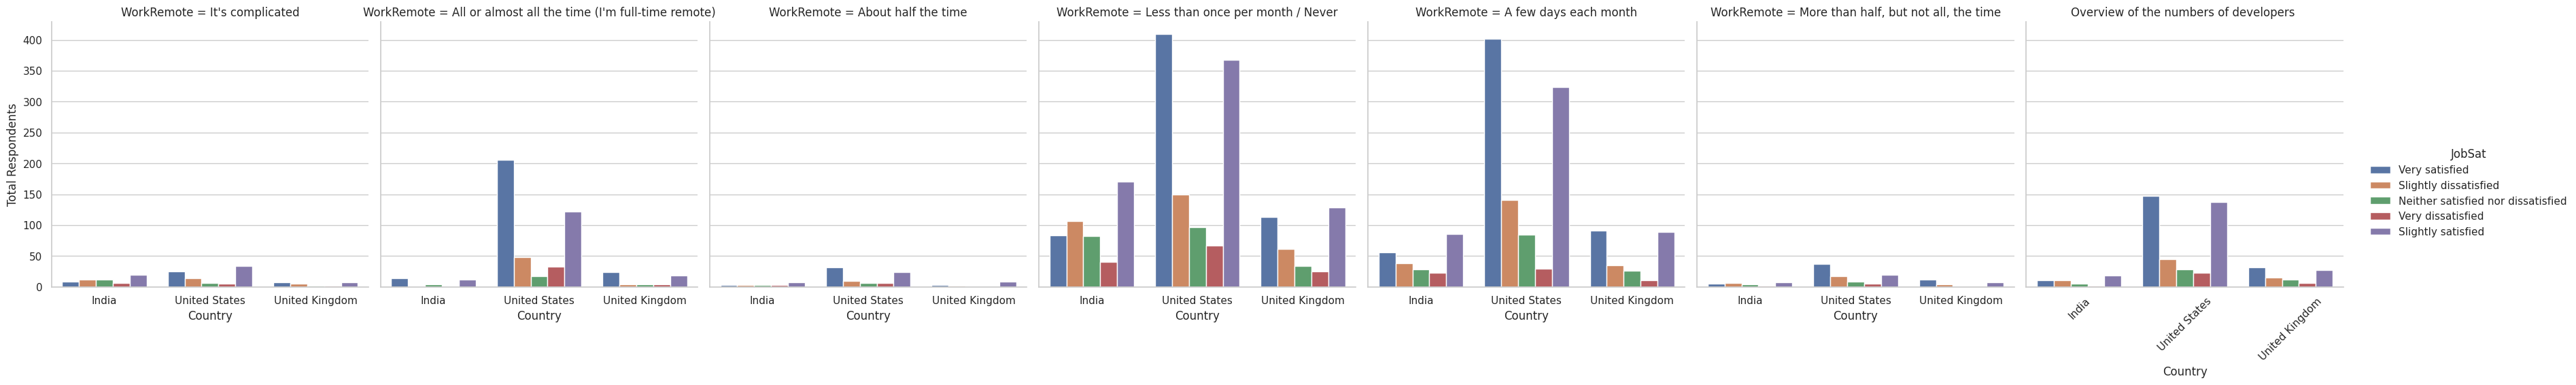

In [ ]:
# To filtered the top 3 countries
df_country = df.groupBy("Country") \
                      .count() \
                      .orderBy(col("count").desc()) \
                      .limit(3)

# Extract the selected countries to the list
df_country_list = [row['Country'] for row in df_country.collect()]

# create new dataframe named df_filtered and assign the extracted data
df_filtered = df.filter(df["Country"].isin(df_country_list))

# group all the columns that related
df_new_filtered = df_filtered.groupBy("Country", "WorkRemote", "JobSat") \
            .count() \
            .withColumnRenamed("count", "Total Respondents") \
            .toPandas()

# To plot the graph
plt.figure(figsize=(14,6))
sns.catplot(data=df_new_filtered, x="Country", y="Total Respondents", hue="JobSat", col="WorkRemote", kind="bar")
plt.title("Overview of the numbers of developers ")
plt.xticks(rotation=45)
plt.show()

The analysis explores the influence of job satisfaction among developers who work remotely in the top three countries, which are India, the United States, and the United Kingdom. Based on the graph shows that each type of work remote reviews differ from one another. It reveals that developers who work remotely for "***A few days each month***" tend to have the highest level of satisfaction especially in the United States while in United Kingdom, the amount of satisfaction for both very and slightly satisfied is about the same level, and in India, many developers slightly satiesfied when working remotely for a few days of each month. In contrast, there are 3 categories of work remote that have more neutral for overall responses like "***It's complicated***", "***About half the time***", and "***More than half, but not all the time***". The findings are very crucial for IT industries to determine the affectiveness of working remotely since it effects the motivation of the developers and their job satisfaction, particularly in countries that established remote work practices.


---



**2. Do developers from different educational backgrounds view their careers differently?**

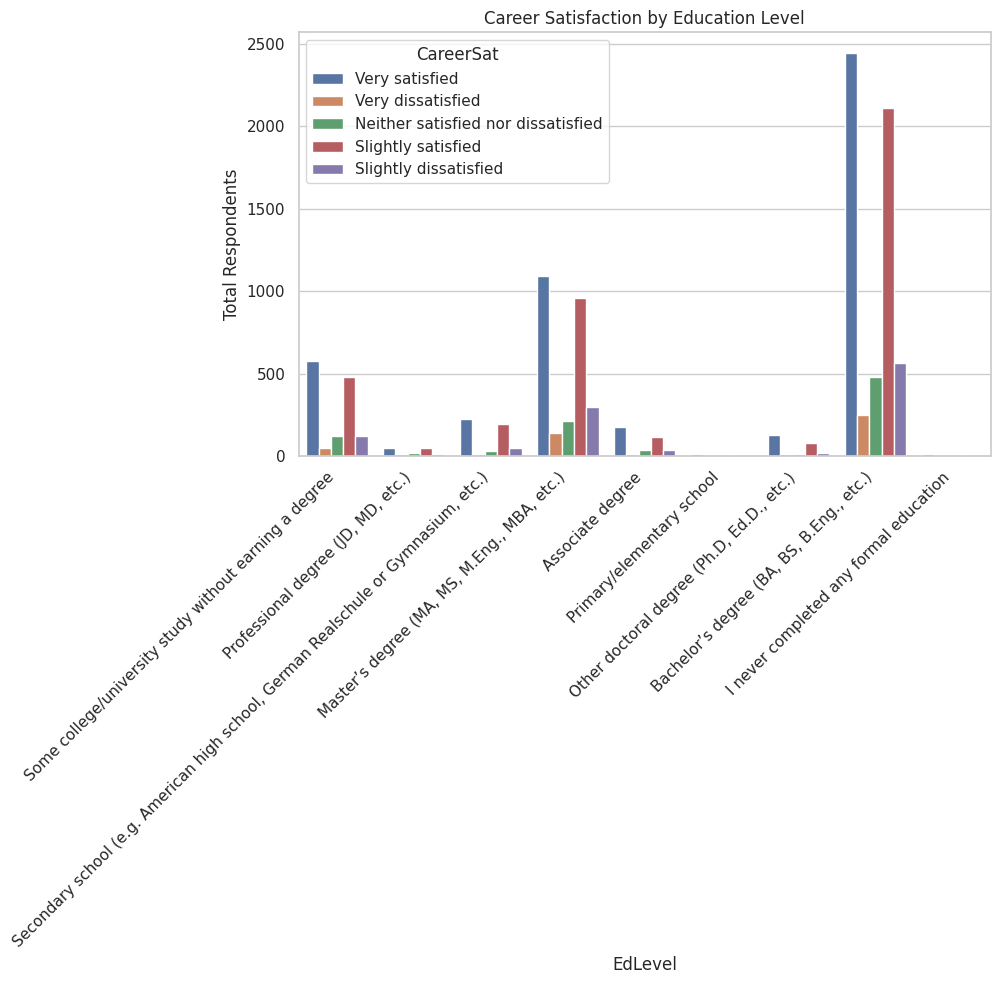

In [ ]:
# To group the df based on education level and career satisfaction
df_career = df.groupBy("EdLevel", "CareerSat") \
               .count() \
               .withColumnRenamed("count", "Total Respondents") \
               .toPandas()

# To plot the graph
plt.figure(figsize=(10, 10))
sns.barplot(data=df_career, x="EdLevel", y="Total Respondents", hue="CareerSat")
plt.xticks(rotation=45, ha="right")
plt.title("Career Satisfaction by Education Level")
plt.tight_layout()
plt.show()

The bar chart displays the distribution of career satisfaction levels among developers based on their educational backgrounds. It clearly shows that those who have ***bachelor's degree*** have the highest satisfaction level, with nearly 2500 respondents, followed by the slightly satisfied with more than 2000 people. Moreover, developers with ***master's degree*** reported have a moderately similar amount between very and slightly satisfied, with more and less than 1000 developers. Interestingly, there are no developers who only have ***primary or elementary schools*** backgrounds and ***never completed any formal education ***. Additionally, there are only a few developers with the highest education (***Professional degrees***) that lean more towards the satisfaction category, which can be interpreted as the higher educational background, the more happiness they will receive due to several factors such as more income, benefits, etc.

---



**3. Is there any significants between years of professional coding experience with career satisfaction?**

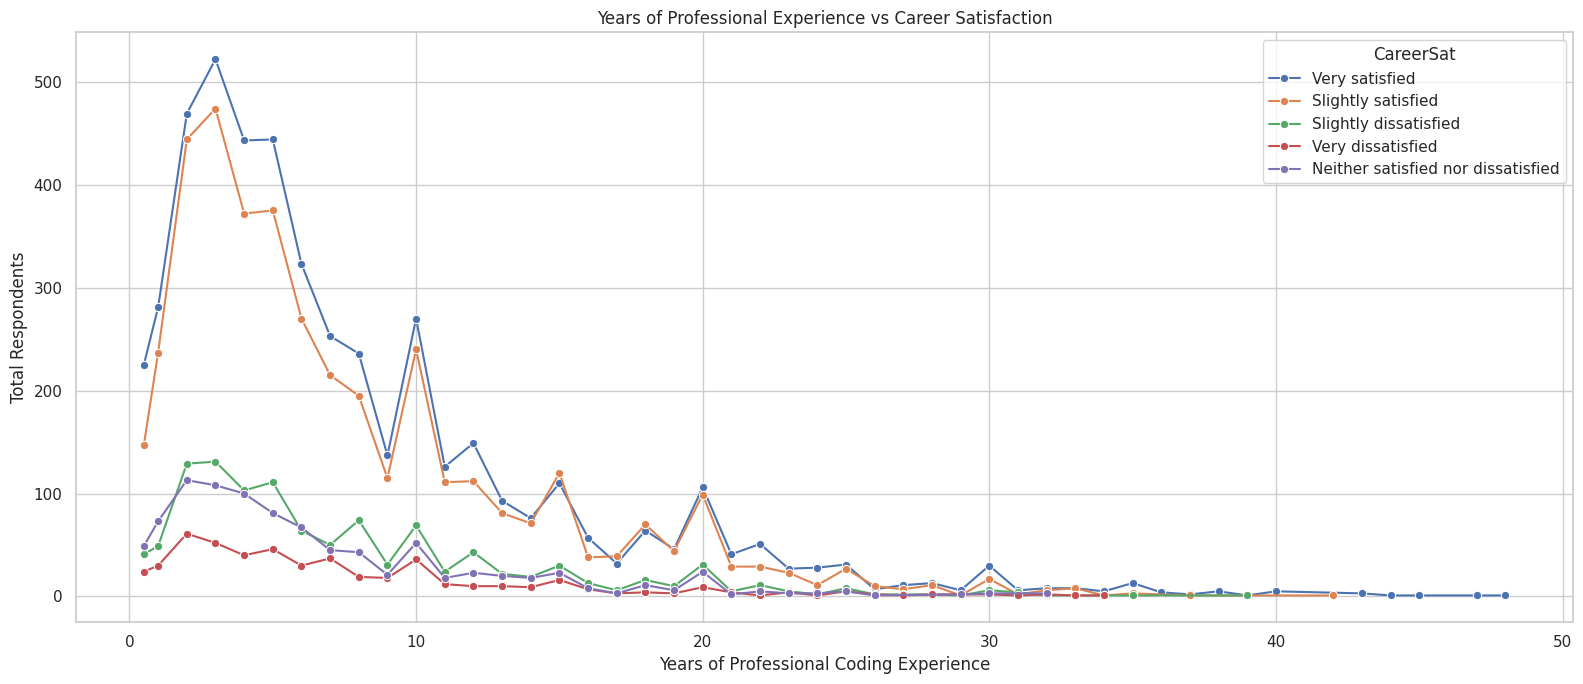

In [ ]:
# To convert the column to numeric values
df = df.withColumn("YearsCodePro",
    when(col("YearsCodePro") == "Less than 1 year", 0.5)
   .when(col("YearsCodePro") == "More than 50 years", 51)
   .otherwise(col("YearsCodePro").cast("float")))

# To group the df based on year code experience and career satisfaction
df_yearProCode = df.groupBy("YearsCodePro", "CareerSat") \
    .count() \
    .orderBy("YearsCodePro") \
    .toPandas()

# To plot the graph
plt.figure(figsize=(16, 7))
sns.lineplot(data=df_yearProCode, x="YearsCodePro", y="count", hue="CareerSat", marker='o')
plt.title("Years of Professional Experience vs Career Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Total Respondents")
plt.tight_layout()
plt.show()

The line graph above illustrates how developers's career satisfaction varies with their years of professional coding experience. Notably, the satisfaction level peaks during the early stages of their career in less than ***10 years***. Developers with roughly ***1-5 years*** of professional coding experience report the highes counts of very and slightly satisfied, with more and nearly 500 respondets. However, as experience increases with more than ***10 years***, the satisfaction levels gradually decline, especially in the very and slightly satisfaction levels, with more than 250 respondents. Moreover, those who have professional coding experience beyond ***20 years*** still do not fluctuate and continuously decrease, which indicates that there are only a few senior developers who answer the survey. Overall, this trend suggests that most early-career developers are generally more enthusiastic and energetic due to their eagerness and passion for coding. However, during their mid-career, the happiness level declines, which indicates burnout, stress, and other issues.

---



**4. How does the work location of developers affect their opinions on the profession?**

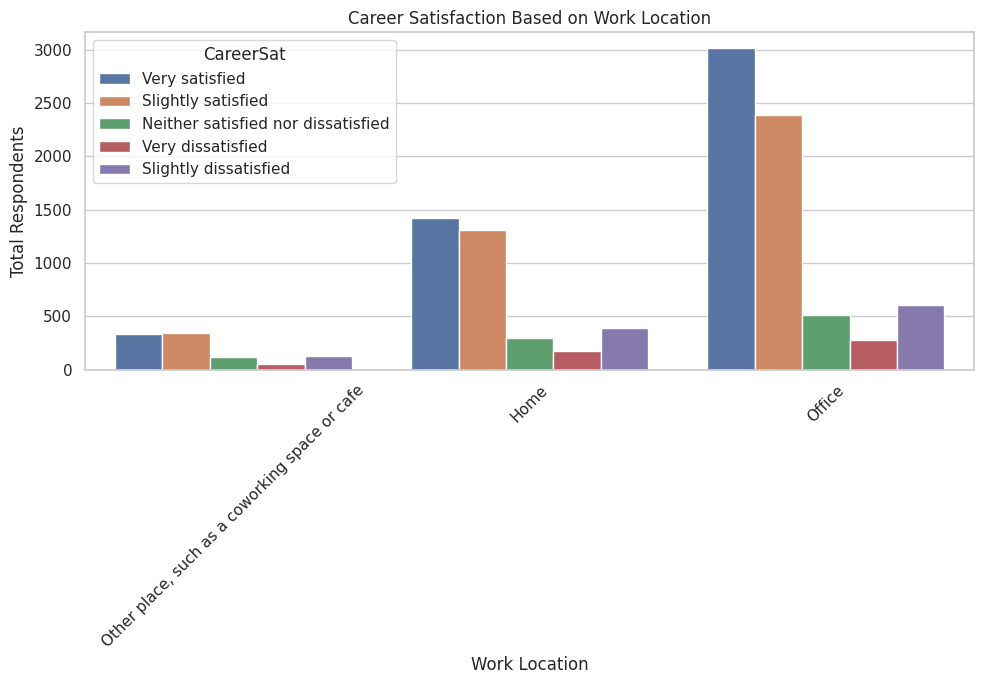

In [ ]:
# To group the df based on developer's work location and career satisfaction
df_career_opinions = df.groupBy("WorkLoc", "CareerSat") \
                      .count() \
                      .toPandas()

# To plot the graph
plt.figure(figsize=(10, 7))
sns.barplot(data=df_career_opinions, x="WorkLoc", y="count", hue="CareerSat")
plt.title("Career Satisfaction Based on Work Location")
plt.xlabel("Work Location")
plt.ylabel("Total Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart above shows how the developers' work locations determine their career satisfaction levels. It compares based 3 main work environments, which are ***home***, ***office***, and ***other places***. Based on the work environments, ***Office*** gains the highest number of respondents who are very and slightly satisfied with their career, with 3000 and nearly 2500 respondents. In addition, those who work at ***home*** also report high satisfaction, although the numbers are slightly lower. Meanwhile, developers working from ***other places*** show a significantly lower total of responders for all categories, as their satisfaction levels are more balanced. Hence, it believes that both ***Office*** and ***home***-based working environments lift up their career satisfaction or motivation, while less structured locations may not offer the same consistency in fulfillment levels.

---



**IMPLEMENTATION OF RDD**

**5. How do working hours per week influence developers enjoyment status on their jobs?**

In [ ]:
df2 = spark.read.csv('/content/devsdd.csv', header=True, inferSchema=True)
df2 = df2.rdd # Convert to RDD

# To see the maximum number in work week hours
max_hours = df2 \
    .filter(lambda x: x["WorkWeekHrs"] is not None) \
    .map(lambda x: x["WorkWeekHrs"]) \
    .max()

print("Maximum WorkWeekHrs:", max_hours)

Maximum WorkWeekHrs: 1012.0


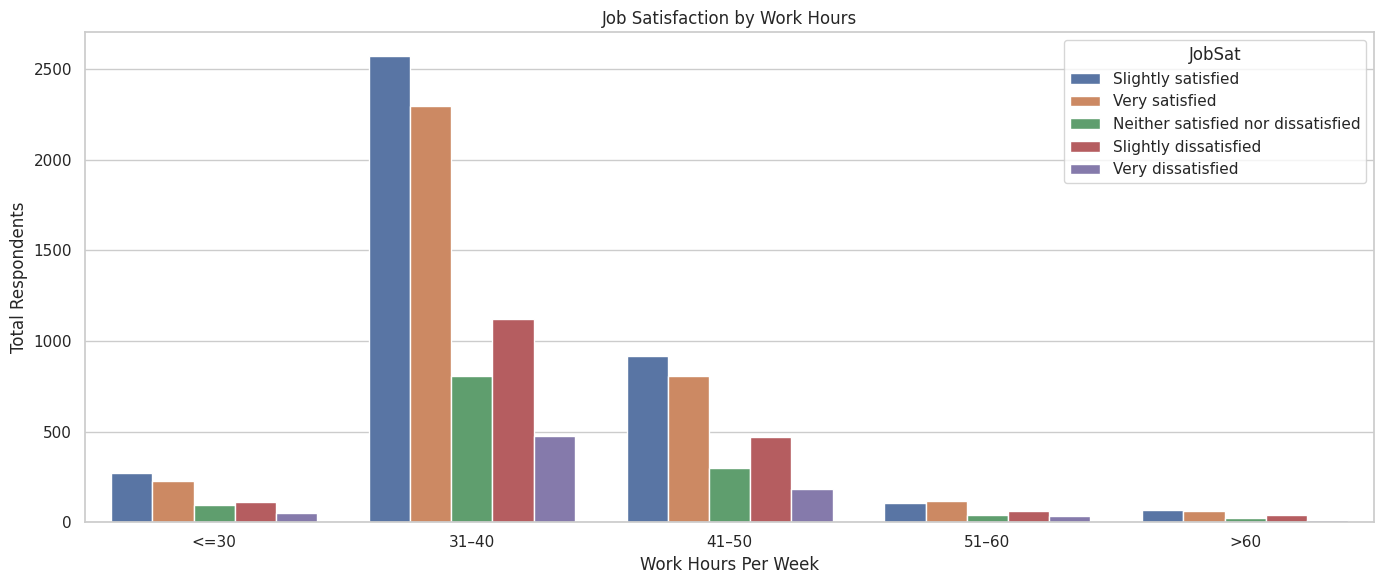

In [ ]:
from pyspark.sql import Row

# To separate work hours based on categories
def workhours_category(hours):
  if hours <= 30:
      return "<=30"
  elif hours <= 40:
      return "31–40"
  elif hours <= 50:
      return "41–50"
  elif hours <= 60:
      return "51–60"
  else:
      return ">60"

# To remove any null values in those two columns
df2_clean = df2.filter(lambda x: x["WorkWeekHrs"] is not None and x["JobSat"] is not None)

# To call the function and store it into new variable
df2_grouped = df2_clean.map(lambda row: Row(
    WorkHourGroup=workhours_category(row["WorkWeekHrs"]),
    JobSat=row["JobSat"]
))

# Convert RDD to Dataframe
df2_converted = spark.createDataFrame(df2_grouped).toPandas()

# To plot the graph
plt.figure(figsize=(14,6))
sns.countplot(data=df2_converted, x="WorkHourGroup", hue="JobSat",order=["<=30", "31–40", "41–50", "51–60", ">60"])
plt.title("Job Satisfaction by Work Hours")
plt.xlabel("Work Hours Per Week")
plt.ylabel("Total Respondents")
plt.tight_layout()
plt.show()

The bar chart presents how the developers' job satisfaction differs based on their weekly working hours. Each of the weekly working hours is categorized into 5 distinct groups, which are ***≤30***, ***31–40***, ***41–50***, ***51–60***, and ***>60*** hours. The highest respondents fall within the ***31-40*** hours range, which typically means a full-time work schedule. This group shows the highest level of satisfaction among the slightly and very satisfied. As work hours increase beyond ***40*** hours per week, it shows a clear decline in satisfaction. Based on the ***51-60*** and ***>60*** categories, job satisfaction has dropped significantly, with fewer respondents reporting very satisfied and more towards dissatisfaction. However, the mixed reaction in the ***<=30*** hours section indicates that there are fewer part-timers who answer the surveys, or there are only a few of them who work in the company. As a result, the IT industry should maintain a moderate work week with only ***31-40*** hours, since it affects the effectiveness of their job, while working overtime might drain their motivation and energy.


---



**JSON FORMAT**

**6. How does work challenge affect developers perception on career fulfillment?**

<ipython-input-103-3718358642>:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


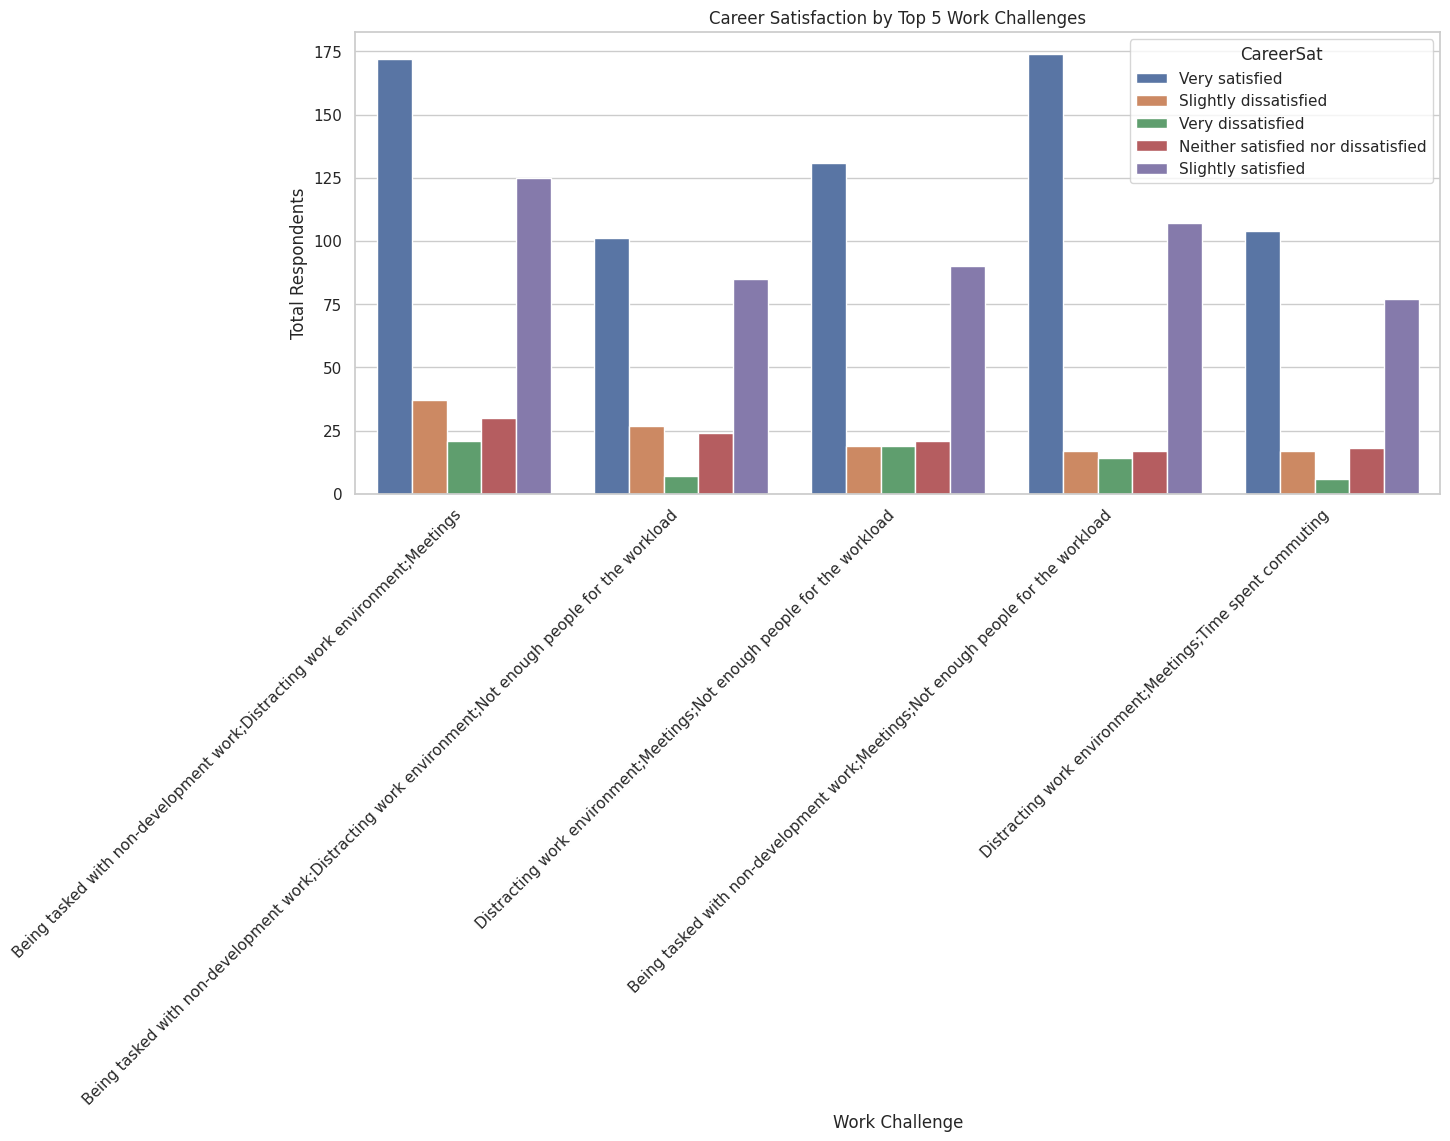

In [ ]:
df.createOrReplaceTempView("developers")

# Create sql query
result = spark.sql("""SELECT WorkChallenge, CareerSat, COUNT(*) AS Total
    FROM developers
    WHERE WorkChallenge IS NOT NULL AND CareerSat IS NOT NULL
    GROUP BY WorkChallenge, CareerSat""")

import json

# Convert SQL to JSON
df_json = result.toJSON().collect()

# Convert JSON to List
df_converted = [json.loads(item) for item in df_json]

# Convert to Pandas DataFrame
df_plot = pd.DataFrame(df_converted)

# Convert 'Total' to int
df_plot["Total"] = df_plot["Total"].astype(int)

# Get top 5 WorkChallenge based on total responses
top_challenges = df_plot.groupby("WorkChallenge")["Total"].sum().nlargest(5).index

df_top = df_plot[df_plot["WorkChallenge"].isin(top_challenges)]

# Plot again
plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x="WorkChallenge", y="Total", hue="CareerSat")
plt.xticks(rotation=45, ha="right")
plt.title("Career Satisfaction by Top 5 Work Challenges")
plt.xlabel("Work Challenge")
plt.ylabel("Total Respondents")
plt.tight_layout()
plt.show()

This bar chart explores how different types of work challenges impact the developers' career satisfaction with focusing only on the top 5 most frequently reported challenges. These include combinations like ***Being tasked with non-development work***, ***Distracting work environment***, ***Not enough people for the workload***, and ***Too many meetings***. Across all the challenges, the very satisfied category dominates the response, particularly for combinations that include ***Being tasked with non-development work and Meetings***. This suggests that even those developers face common challenges, but many people still report a positive career satisfaction due to several factors such as a healthy work environment, team culture, flexibility, work benefits, etc. However, the slightly satisfied and dissatisfied level can be seen in the Not enough people for the workload and Distracting environments categories, which can be interpreted as potential stress and burning out. Thus, the overall data shows that while developers can remain satisfied in the presence of certain challenges, the company should take immediate action to improve the work situation before it negatively impacts productivity.

---

